#**Random Forest Feature Selection**

In this step we are going to outline how the random forest machine learning approach can help in determining the importance of a feature.
Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting, and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision. In scikit learn random forest library the relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features, [scikt learn](https://scikit-learn.org/stable/modules/ensemble.html#forest).

Random forests are also incredibly robust and generally are very easy to implement. In every project I give, students always use Random forests for predictions. Lately, I have also found them using them for dimensionality reduction. However, there is an issue with them and Sebastian Raschka explains it really nicely below:


"The random forest technique comes with an important gotcha that is worth mentioning. For instance, if two or more features are highly correlated, one feature may be ranked very highly while the information of the other feature(s) may not be fully captured. On the other hand, we don't need to be concerned about this problem if we are merely interested in the predictive performance of a model rather than the interpretation of feature importances." - Python Machine Learning by Sebastian Raschka.

This "gotcha" is really important to understand and in a way negates the use of random forests for feature importance and thus the use of them for feature reduction and engineering.

Have a look at the code below and play about with the standardisation methods from scikit learn. The description of how the Ranodmforest Classifier works can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier).


Aa  test example we are going to use the Scikit learns wine dataset. We can import this directly. In this example the $y$ variable is the wine class of which there are 3. The $X$ variables are characteristics that are normally used to characterize wine.

13
                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                

<Axes: >

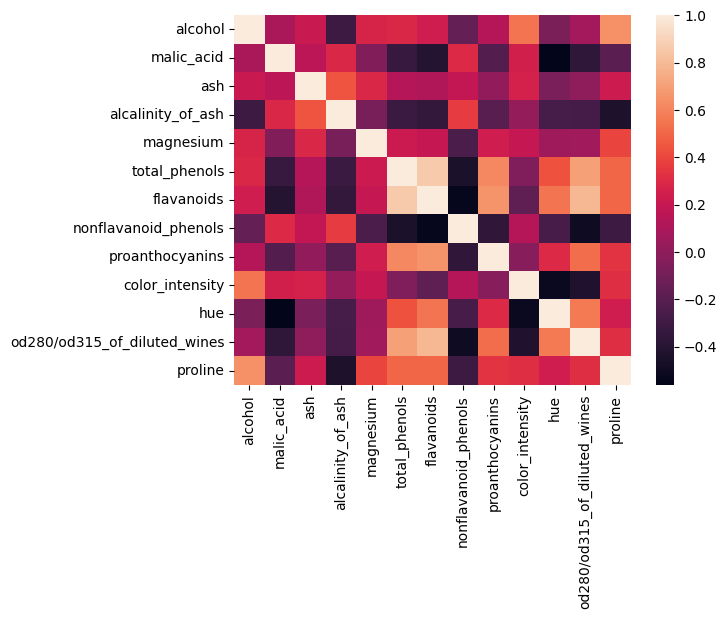

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
data = load_wine()

X=data.data
print(len(X[1,:]))
y=data.target
df_X=pd.DataFrame(X,columns=data.feature_names)
print(df_X.corr())

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df_X.corr()

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)



For demonstration purposes we split the dataset into training and test. However, if you are doing this on  a real dataset it maybe worth while using a bootstrapping approach.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train[1,:])

[ 12.22   1.29   1.94  19.    92.     2.36   2.04   0.39   2.08   2.7
   0.86   3.02 312.  ]


The next 2 pieces of code are not really necessary but demonstrate how random forests don't need normalised or standarised data.

In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)
print(X_train[1,:])

[0.31989247 0.08403361 0.31182796 0.43298969 0.23913043 0.45323741
 0.48012232 0.48076923 0.52531646 0.1356256  0.27350427 0.64102564
 0.        ]


In [4]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)
print(X_train[1,:])

[-0.95609928 -0.96608672 -1.53725357 -0.14748691 -0.55401928  0.16998569
  0.07243241  0.20791318  0.78462633 -0.98210744 -0.40859506  0.58118003
 -1.41336684]


The next code fragement imports random forest classifer from scikit learn. The n_estimators refers to the number of random trees we are going to examine and the n_jobs=-1 specifies that all available processors should be used. I have also added in a variable here called no_f. This variable allows us to set the number of features in our training set.

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
no_f=13
feat_labels = data.feature_names[0:no_f]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train[:,0:no_f], y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train[:,0:no_f].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))



 1) alcohol                        0.182483
 2) malic_acid                     0.158610
 3) ash                            0.150948
 4) alcalinity_of_ash              0.131987
 5) magnesium                      0.106589
 6) total_phenols                  0.078243
 7) flavanoids                     0.060718
 8) nonflavanoid_phenols           0.032033
 9) proanthocyanins                0.025400
10) color_intensity                0.022351
11) hue                            0.022078
12) od280/od315_of_diluted_wines   0.014645
13) proline                        0.013916


Now we are going to plot the attribute importance.

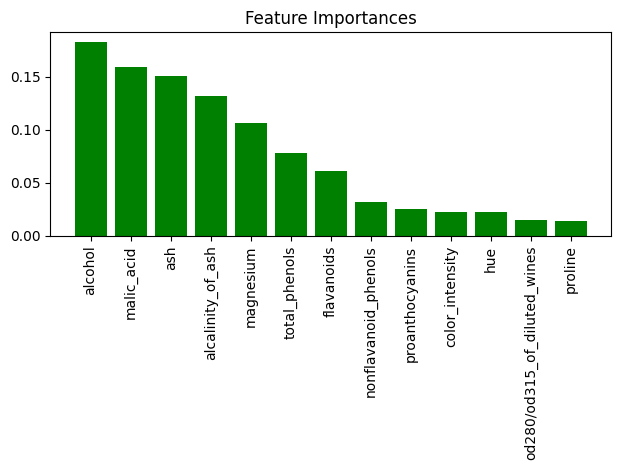

In [7]:
import matplotlib.pyplot as plt

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Adjust the variable that go into the $X_train$ dataset. See if the variable importance is affected by the correlation between the features. Put your comments on the comments board.